#Study proposal
The objective is to analyze both variances of heart rate and breathing rate, of patients who have diabetes, depression and no reports. It will be used ANOVA and it's variation (MANOVA) to check if there's a significant difference of variations between those 3 group of patients.

#Dependent variables : 
Heart rate e breathing rate

#Independent variables : 
Diabetic, depressive and unreported patients

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import variation 

In [9]:
data = pd.read_csv("../input/in-hospital-mortality-prediction/data01.csv")
data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


#Creating 3 dataframes for each kind of patient

No report

In [10]:
sl = data.loc[(data['diabetes'] ==  0) & (data['depression'] ==  0) & (data['hypertensive'] ==  0)]
sl = sl[['Respiratory rate','heart rate','diabetes','depression']]
sl = sl.dropna()
sl.drop(sl.tail(116).index,
        inplace = True)
print(sl)

     Respiratory rate  heart rate  diabetes  depression
1           20.851852  101.370370         0           0
2           23.640000   72.318182         0           0
3           21.857143   94.500000         0           0
19          25.583333   70.083333         0           0
20          20.043478   93.173913         0           0
..                ...         ...       ...         ...
479         24.400000   85.900000         0           0
480         21.416667   85.291667         0           0
487         28.285714   86.809524         0           0
497         19.294118   70.392857         0           0
502         29.166667  117.026316         0           0

[79 rows x 4 columns]


Diabetics

In [11]:
dia = data[['Respiratory rate','heart rate','diabetes','depression']]
dia = dia.loc[(dia['diabetes'] ==  1) & (dia['depression'] ==  0)]

dia = dia.dropna()
dia.drop(dia.tail(351).index,
        inplace = True)
print(dia)

     Respiratory rate  heart rate  diabetes  depression
0           16.621622   68.837838         1           0
7           18.400000   84.666667         1           0
8           18.583333   91.916667         1           0
9           18.125000   75.083333         1           0
10          17.481481   95.629630         1           0
..                ...         ...       ...         ...
218         19.791667   72.375000         1           0
224         15.000000   58.193548         1           0
228         19.000000   67.720000         1           0
229         12.709677   79.258065         1           0
230         21.763158   66.437500         1           0

[79 rows x 4 columns]


Depressives

In [12]:
dep = data[['Respiratory rate','heart rate','diabetes','depression']]
dep = dep.loc[(dep['depression'] == 1) & (dep['diabetes'] == 0)]

dep = dep.dropna()

#Joining the dfs


In [13]:
df = pd.concat([sl,dia,dep])

#Checking the correlation between variables using a heatmap

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


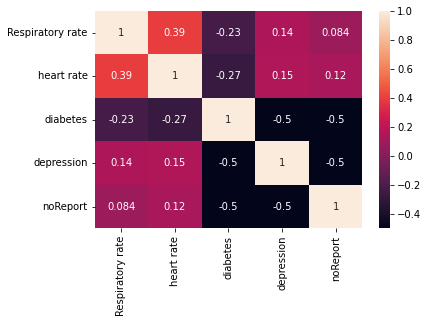

In [14]:
matriz = df
matriz = matriz.assign(noReport=0)
lista3 = matriz.loc[(matriz['diabetes'] == 0) & (matriz['depression'] == 0)].index.values.astype(float)
for x in lista3:
  matriz.noReport.loc[x] = 1

hm = sns.heatmap(matriz.corr(), annot=True)
plt.show()

#Creating column CATEGORY and removing depression and diabetes columns
#Rounding values of breathing rate and heart rate

In [15]:
df.rename(columns = {'Respiratory rate':'respiracao', 'heart rate':'batimentos','depression':'depressao'}, inplace = True)

In [16]:
df = df.assign(categoria = 0)

In [17]:
lista = df.loc[(df['depressao'] == 1)].index.values.astype(int)
lista2 = df.loc[(df['diabetes'] == 1)].index.values.astype(int)
lista3 = df.loc[(df['diabetes'] == 0) & (df['depressao'] == 0)].index.values.astype(int)

for i in lista:
  df.categoria.loc[i] = 'Depressao'
for x in lista2:
  df.categoria.loc[x] = 'Diabetes'
for x in lista3:
  df.categoria.loc[x] = 'SemLaudo'

df = df.drop(columns=['diabetes','depressao'])
df = df.round(3)

#Boxplots, normality rate and variances for each kind of patient

In [18]:
dp = df.loc[(df['categoria'] == 'Depressao')]

db = df.loc[(df['categoria'] == 'Diabetes')]

sl = df.loc[(df['categoria'] == 'SemLaudo')]

##Depressivos

In [19]:
print(dp.var())

respiracao     14.639680
batimentos    296.224596
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

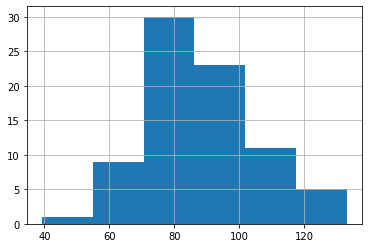

In [20]:
dp['batimentos'].hist(bins=6)

<AxesSubplot:>

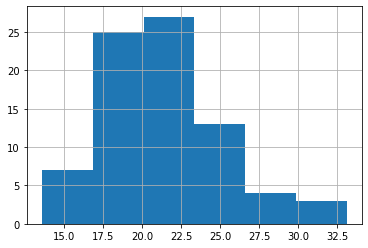

In [21]:
dp['respiracao'].hist(bins=6)

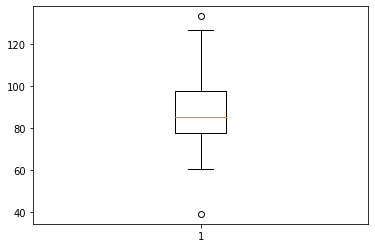

In [22]:
plt.boxplot(dp['batimentos'])

plt.show()

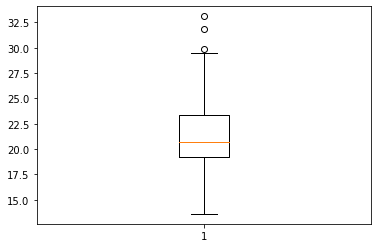

In [23]:
plt.boxplot(dp['respiracao'])

plt.show()

##Diabeticos

In [24]:
print(db.var())

respiracao     15.081061
batimentos    224.449248
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

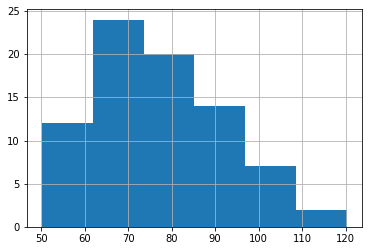

In [25]:
db['batimentos'].hist(bins=6)

<AxesSubplot:>

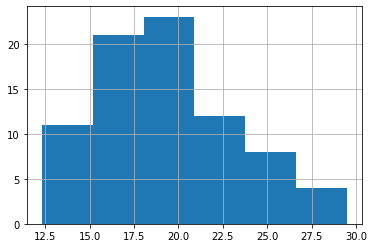

In [26]:
db['respiracao'].hist(bins=6)

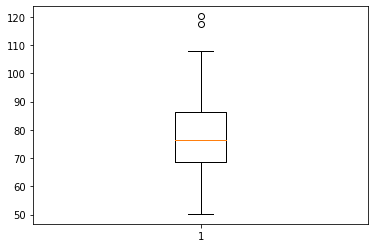

In [27]:
plt.boxplot(db['batimentos'])

plt.show()

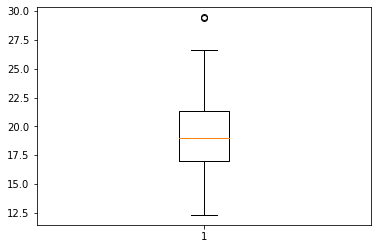

In [28]:
plt.boxplot(db['respiracao'])

plt.show()

##Sem laudo

In [29]:
print(sl.var())

respiracao     15.007744
batimentos    241.882523
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

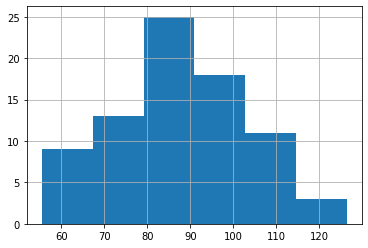

In [30]:
sl['batimentos'].hist(bins=6)

<AxesSubplot:>

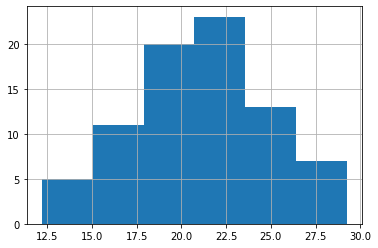

In [31]:
sl['respiracao'].hist(bins=6)

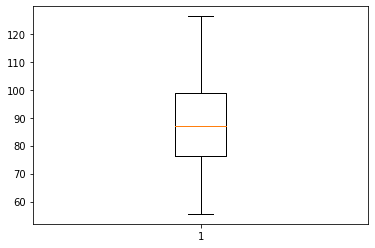

In [32]:
plt.boxplot(sl['batimentos'])

plt.show()

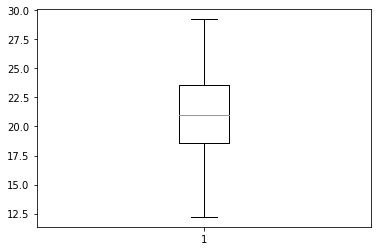

In [33]:
plt.boxplot(sl['respiracao'])

plt.show()

#MANOVA

In [34]:
from statsmodels.multivariate.manova import MANOVA

In [35]:
maov = MANOVA.from_formula('respiracao + batimentos ~ categoria', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0611 2.0000 233.0000 1788.9699 0.0000
         Pillai's trace  0.9389 2.0000 233.0000 1788.9699 0.0000
 Hotelling-Lawley trace 15.3560 2.0000 233.0000 1788.9699 0.0000
    Roy's greatest root 15.3560 2.0000 233.0000 1788.9699 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          categoria        Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9074 4.0000 466.0000  5.7969 0.0001
            Pillai's trace 0.0926 4.0000 468.

#ANOVA breathing rate

In [36]:
media = db.respiracao.mean() + dp.respiracao.mean()
media = media / 2
media = media.round(3)

#SQTOTAL
val = db.respiracao.values.astype(float)
lista = []
for i in val:
  lista.append((i - media)**2)
soma1 = sum(lista)
print("SQTOTAL DB", soma1)

val = dp.respiracao.values.astype(float)
lista = []
for i in val:
  lista.append((i - media)**2)
soma2 = sum(lista)
print("SQTOTAL DP", soma2)
print("SQTOTAL", soma1 + soma2)

#SQERRO
val = db.respiracao.values.astype(float)
lista = []
for i in val:
  lista.append((i - db.respiracao.mean())**2)
soma3 = sum(lista)
print("SQERRO DB:",soma3)
 
val = dp.respiracao.values.astype(float)
lista = []
for i in val:
  lista.append((i - dp.respiracao.mean())**2)
soma4 = sum(lista)
print("SQERRO DP:",soma4)
sqerro = soma3 + soma4
print("SQERRO:", sqerro)

#SQTRATAMENTOS
sqtrat = (db.respiracao.mean() - media)**2 + (dp.respiracao.mean() - media)**2
sqtrat = sqtrat * 79
print("SQTRATAMENTO:", sqtrat)

SQTOTAL DB 1259.051741
SQTOTAL DP 1224.7735119999995
SQTOTAL 2483.8252529999995
SQERRO DB: 1176.3227454430378
SQERRO DP: 1141.8950429367092
SQERRO: 2318.2177883797467
SQTRATAMENTO: 165.60746462025259


##F value
F = [SQtrat/k-1]/[SQerro/N-k]



In [37]:
f1 = (sqtrat) / (sqerro/79)
f1

5.64355504930533

#ANOVA heart rate

In [38]:
media = db.batimentos.mean() + dp.batimentos.mean()
media = media / 2
media = media.round(3)

#SQTOTAL
val = db.batimentos.values.astype(float)
lista = []
for i in val:
  lista.append((i - media)**2)
soma1 = sum(lista)
print("SQTOTAL DB", soma1)

val = dp.batimentos.values.astype(float)
lista = []
for i in val:
  lista.append((i - media)**2)
soma2 = sum(lista)
print("SQTOTAL DP", soma2)
print("SQTOTAL", soma1 + soma2)

#SQERRO
val = db.batimentos.values.astype(float)
lista = []
for i in val:
  lista.append((i - db.batimentos.mean())**2)
soma3 = sum(lista)
print("SQERRO DB:",soma3)
 
val = dp.batimentos.values.astype(float)
lista = []
for i in val:
  lista.append((i - dp.batimentos.mean())**2)
soma4 = sum(lista)
print("SQERRO DP:",soma4)
sqerro = soma3 + soma4
print("SQERRO:", sqerro)

#SQTRATAMENTOS
sqtrat = (db.batimentos.mean() - media)**2 + (dp.batimentos.mean() - media)**2
sqtrat = sqtrat * 79
print("SQTRATAMENTO:", sqtrat)

SQTOTAL DB 19452.07588
SQTOTAL DP 25049.83853799999
SQTOTAL 44501.914417999986
SQERRO DB: 17507.041347544302
SQERRO DP: 23105.518456987338
SQERRO: 40612.559804531644
SQTRATAMENTO: 3889.3546134683547


##F value

In [39]:
f2 = (sqtrat) / (sqerro/79)
f2

7.565615561856688

#Conclusion

In the first application, referring to the MANOVA technique, the results showed that there is a significant difference in variance among the results of the three groups presented to the technique.

With the MANOVA results in hand, we applied the correlated technique, ANOVA, to verify the relationship between the two and verify the results obtained.

The results derived from the application of ANOVA for two of the three possible groups, we obtained results sufficiently close to those returned by the application of the MANOVA technique, which reaffirms the initial thesis about the difference between the heart beats and the breathing rate of the patients in the three analyzed groups. .